<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n250.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,22.229492,44.593729,42.624580,85.215388,-1264.883068,-1060.219878,280.505179,-1340.725057
1,0.0,1.0,33.556186,82.284330,67.372467,28.722930,-1212.570800,-990.634888,-58.140427,-932.494461
2,0.0,2.0,34.723805,28.797634,94.833536,89.595819,455.020917,712.971711,161.422840,551.548872
3,0.0,3.0,75.401143,43.114740,87.695613,36.766464,-495.258746,-242.280787,143.187046,-385.467832
4,0.0,4.0,47.559858,76.377106,65.192910,68.273140,6.828842,274.231856,134.351179,139.880677
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.609610,85.600135,64.393174,88.514059,1024.450615,1348.567593,389.540891,959.026702
119996,999.0,116.0,73.892586,74.846135,54.515313,40.160541,-778.152972,-524.738397,282.735061,-807.473458
119997,999.0,117.0,73.445563,61.045068,59.825720,77.743032,19.168219,301.227602,331.306961,-30.079359
119998,999.0,118.0,24.073359,90.517666,42.004422,27.340799,-438.817583,-244.881336,172.314902,-417.196238


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,22.229492,44.593729,42.624580,85.215388,-1264.883068,-1060.219878,280.505179,-1340.725057
1,0.0,1.0,33.556186,82.284330,67.372467,28.722930,-1212.570800,-990.634888,-58.140427,-932.494461
2,0.0,2.0,34.723805,28.797634,94.833536,89.595819,455.020917,712.971711,161.422840,551.548872
3,0.0,3.0,75.401143,43.114740,87.695613,36.766464,-495.258746,-242.280787,143.187046,-385.467832
4,0.0,4.0,47.559858,76.377106,65.192910,68.273140,6.828842,274.231856,134.351179,139.880677
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.609610,85.600135,64.393174,88.514059,1024.450615,1348.567593,389.540891,959.026702
119996,999.0,116.0,73.892586,74.846135,54.515313,40.160541,-778.152972,-524.738397,282.735061,-807.473458
119997,999.0,117.0,73.445563,61.045068,59.825720,77.743032,19.168219,301.227602,331.306961,-30.079359
119998,999.0,118.0,24.073359,90.517666,42.004422,27.340799,-438.817583,-244.881336,172.314902,-417.196238


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,22.229492,44.593729,42.624580,85.215388,-1264.883068,-1060.219878,280.505179,-1340.725057
1,0.0,1.0,33.556186,82.284330,67.372467,28.722930,-1212.570800,-990.634888,-58.140427,-932.494461
2,0.0,2.0,34.723805,28.797634,94.833536,89.595819,455.020917,712.971711,161.422840,551.548872
3,0.0,3.0,75.401143,43.114740,87.695613,36.766464,-495.258746,-242.280787,143.187046,-385.467832
4,0.0,4.0,47.559858,76.377106,65.192910,68.273140,6.828842,274.231856,134.351179,139.880677
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.609610,85.600135,64.393174,88.514059,1024.450615,1348.567593,389.540891,959.026702
119996,999.0,116.0,73.892586,74.846135,54.515313,40.160541,-778.152972,-524.738397,282.735061,-807.473458
119997,999.0,117.0,73.445563,61.045068,59.825720,77.743032,19.168219,301.227602,331.306961,-30.079359
119998,999.0,118.0,24.073359,90.517666,42.004422,27.340799,-438.817583,-244.881336,172.314902,-417.196238


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

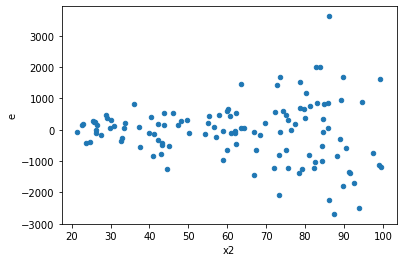

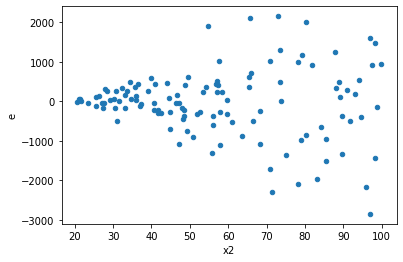

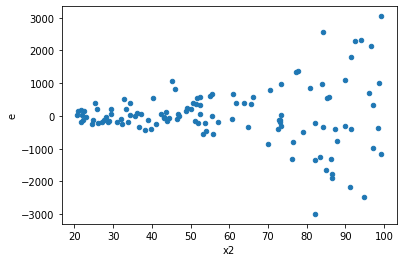

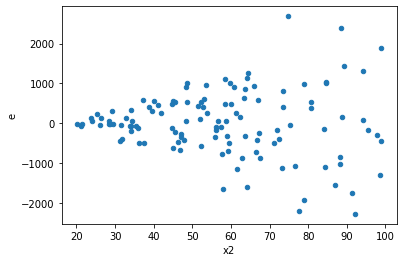

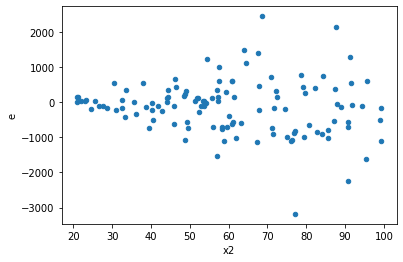

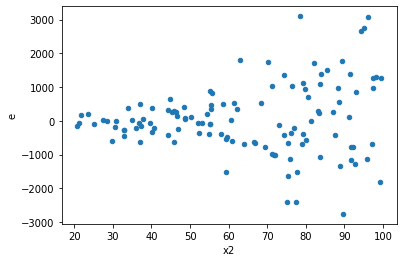

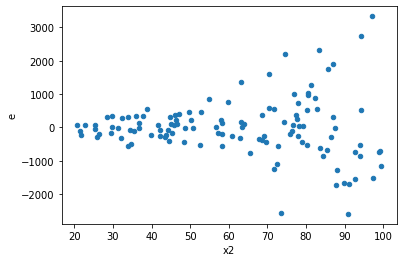

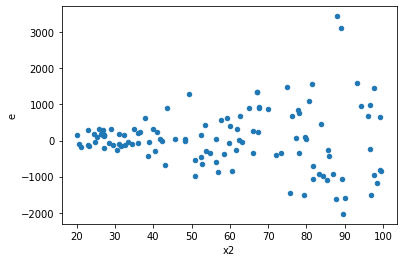

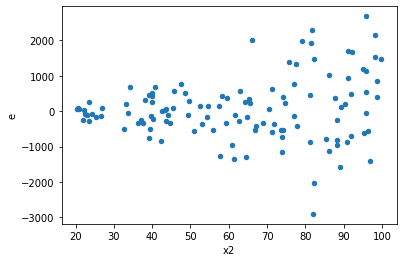

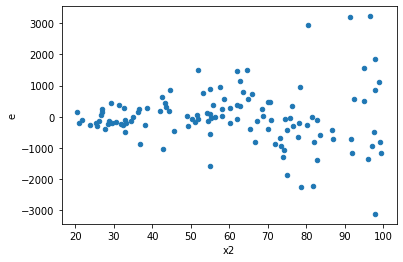

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,6837014.642661078,73818767.11019434,155386.69642411542,1677699.2525044167,10.796929795876942,9.42579347906758e-13,0.9999999999995287,4.71289673953379e-13,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,3442787.2906428,68933801.60608032,78245.16569642727,1566677.3092290983,20.022672267158786,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3437366.8248036387,81615628.26515426,78121.9732909918,1854900.6423898696,23.743648096044154,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,6366186.111321108,60056702.18930586,144686.04798457064,1364925.0497569514,9.433701927517623,1.1023626456108104e-11,0.9999999999944882,5.511813228054052e-12,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,4657278.616131852,49538866.11937665,105847.24127572392,1125883.320894924,10.636869769350762,1.241229341530925e-12,0.9999999999993794,6.206146707654625e-13,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,4533773.649788456,89126013.12775552,103040.3102224649,2025591.2074489892,19.658240576680335,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,3391310.9948999966,55655033.32255324,77075.24988409084,1264887.120967119,16.411067403210655,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,4241271.308027617,62818260.46408924,96392.52972790039,1427687.73782021,14.81118652918777,2.4424906541753444e-15,0.9999999999999988,1.2212453270876722e-15,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,5816541.231670048,64145308.161199704,132194.118901592,1457847.9127545387,11.028084493227647,6.372680161348399e-13,0.9999999999996814,3.1863400806741993e-13,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,6837014.642661078,73818767.11019434,155386.69642411542,1677699.2525044167,10.796929795876942,9.42579347906758e-13,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,3442787.2906428,68933801.60608032,78245.16569642727,1566677.3092290983,20.022672267158786,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3437366.8248036387,81615628.26515426,78121.9732909918,1854900.6423898696,23.743648096044154,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,6366186.111321108,60056702.18930586,144686.04798457064,1364925.0497569514,9.433701927517623,1.1023626456108104e-11,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,4657278.616131852,49538866.11937665,105847.24127572392,1125883.320894924,10.636869769350762,1.241229341530925e-12,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,4533773.649788456,89126013.12775552,103040.3102224649,2025591.2074489892,19.658240576680335,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,3391310.9948999966,55655033.32255324,77075.24988409084,1264887.120967119,16.411067403210655,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,4241271.308027617,62818260.46408924,96392.52972790039,1427687.73782021,14.81118652918777,2.4424906541753444e-15,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,5816541.231670048,64145308.161199704,132194.118901592,1457847.9127545387,11.028084493227647,6.372680161348399e-13,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64